In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df  = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


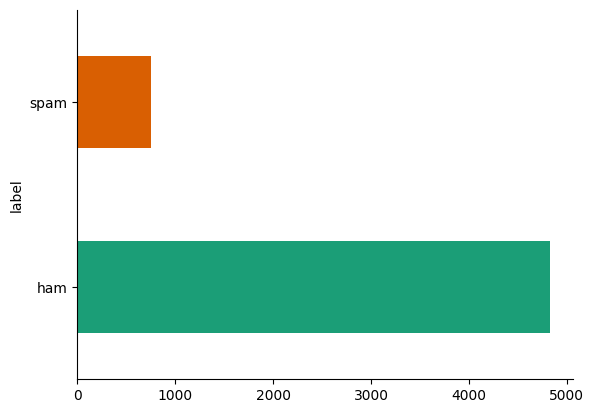

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [13]:
df.shape

(5572, 4)

In [14]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Dataset Balancing

In [15]:
ham = df[df['label']=='ham']
ham.shape

(4825, 4)

In [16]:
spam = df[df['label']=='spam']
spam.shape

(747, 4)

In [17]:
ham = ham.sample(spam.shape[0])

In [18]:
ham.shape

(747, 4)

In [19]:
data = pd.concat([ham, spam], axis=0, ignore_index=True)

In [20]:
data.shape

(1494, 4)

In [36]:
data.sample(5)

,label,message,length,punct
325,ham,Aiya we discuss later lar... Pick ü up at 4 is...,50,4
1417,spam,You can donate £2.50 to UNICEF's Asian Tsunami...,135,4
1430,spam,Free video camera phones with Half Price line ...,145,2
1228,spam,I am hot n horny and willing I live local to y...,155,2
480,ham,Happy valentines day I know its early but i ha...,145,4


Exploratory Data Analysis

In [22]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')

In [23]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

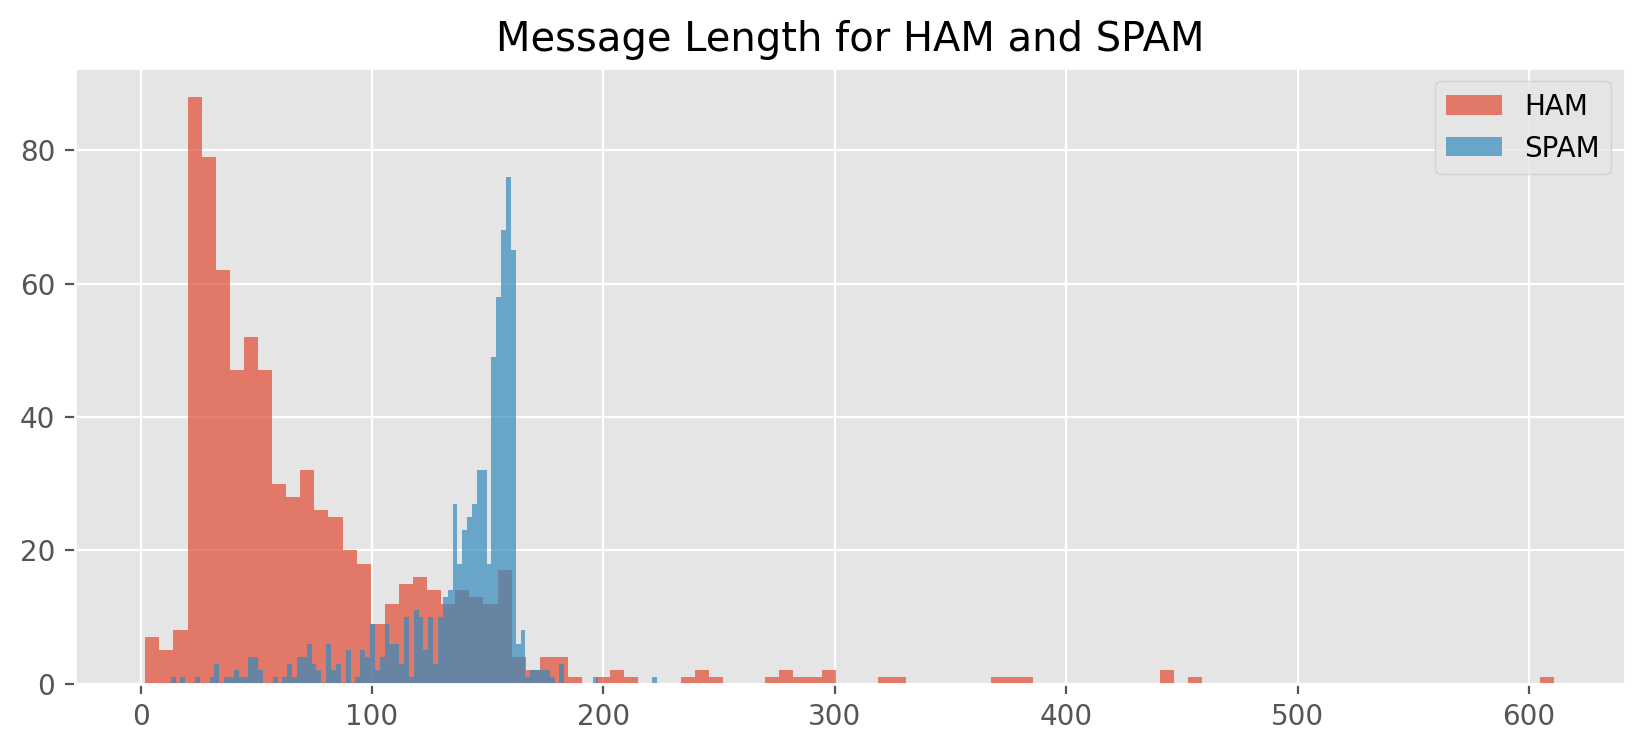

In [24]:
plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')
plt.title('Message Length for HAM and SPAM')
plt.legend()
plt.show()

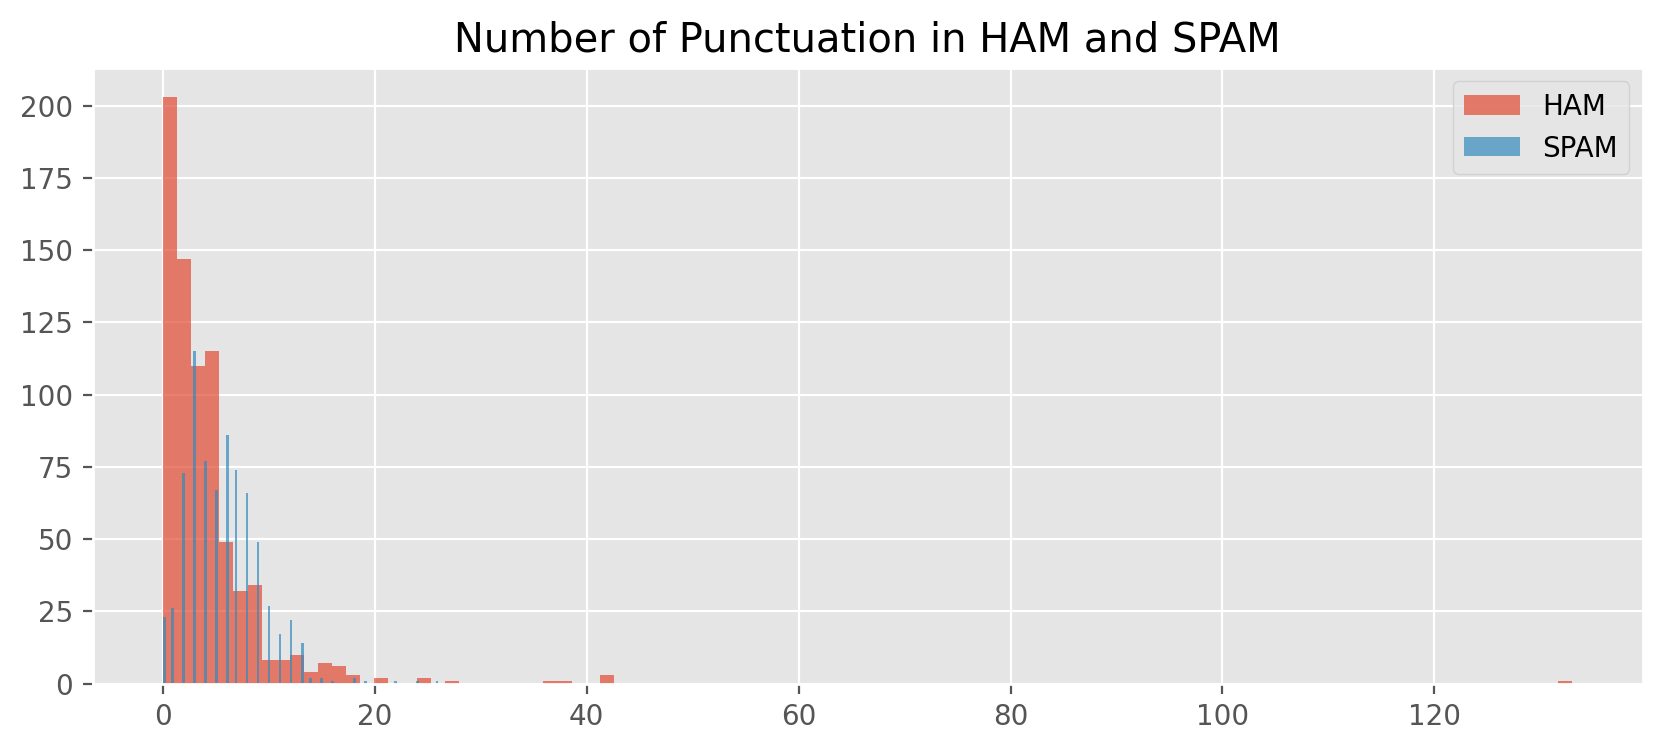

In [25]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')
plt.title('Number of Punctuation in HAM and SPAM')
plt.legend()
plt.show()

Data Preparation for Training

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=0, shuffle=True, stratify=data['label'])

X_train.shape, X_test.shape

((1195,), (299,))

In [28]:
# model Building
clf = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [29]:
y_pred = clf.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.95       150
        spam       0.99      0.89      0.94       149

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



In [31]:
clf.predict(['you have won lottery ticket worth $1000, please click here to claim','hi, how are you doing today?'])

array(['spam', 'ham'], dtype=object)

In [32]:
clf.classes_

array(['ham', 'spam'], dtype=object)

Save and Load Model

In [33]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))

In [34]:
model = pickle.load(open('model.pkl', 'rb'))

In [35]:
model.predict(['you have won lottery ticket worth $1000, please click here to claim', 'hi, how are you doing today?'])

array(['spam', 'ham'], dtype=object)